<a href="https://colab.research.google.com/github/NigGusta/ICD-Projeto-Final/blob/main/exploracao_inicial_secoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import folium
import pandas as pd
import numpy as np
from folium import plugins
import plotly as px

In [2]:
secoes = pd.read_csv('https://raw.githubusercontent.com/NigGusta/ICD-Projeto-Final/main/csv/secoes_jp.csv')

In [3]:
secoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ano                            3222 non-null   int64  
 1   turno                          3222 non-null   int64  
 2   sigla_uf                       3222 non-null   object 
 3   id_municipio                   3222 non-null   int64  
 4   id_municipio_tse               3222 non-null   int64  
 5   zona                           3222 non-null   int64  
 6   secao                          3222 non-null   int64  
 7   tipo_secao_agregada            3222 non-null   object 
 8   numero                         3222 non-null   int64  
 9   nome                           3222 non-null   object 
 10  tipo                           3222 non-null   object 
 11  endereco                       3222 non-null   object 
 12  bairro                         3222 non-null   o

In [4]:
# Filtrando apenas as seções do segundo turno
secoes = secoes[(secoes.turno==2)]

<AxesSubplot:>

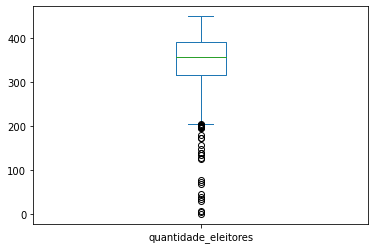

In [5]:
secoes.quantidade_eleitores.plot(kind='box')

In [22]:
secoes.describe()

,turno,zona,secao,latitude,longitude,quantidade_eleitores,quantidade_eleitores_eleicao
count,728.0,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,2.0,66.428571,271.704670,-7.141709,-34.860665,352.662088,354.858516
std,0.0,17.370479,152.679819,0.033642,0.023762,62.547004,110.935539
min,2.0,1.000000,1.000000,-7.205393,-34.914477,0.000000,0.000000
25%,2.0,64.000000,156.000000,-7.165675,-34.878005,323.750000,368.750000
50%,2.0,70.000000,274.000000,-7.145350,-34.858038,373.500000,391.000000
75%,2.0,76.000000,378.250000,-7.122656,-34.839478,393.000000,402.000000
max,2.0,77.000000,671.000000,-7.064684,-34.799019,440.000000,463.000000


In [6]:
# Quais as zonas eleitorais de João Pessoas?
for i in secoes.zona.unique():
  print(i)

64
76
1
70
77


In [7]:
# Verificando os valores nulos
secoes.isnull().sum()

ano                                0
turno                              0
sigla_uf                           0
id_municipio                       0
id_municipio_tse                   0
zona                               0
secao                              0
tipo_secao_agregada                0
numero                             0
nome                               0
tipo                               0
endereco                           0
bairro                             0
cep                                0
telefone                         861
latitude                          25
longitude                         25
situacao                           0
situacao_zona                      0
situacao_secao                     0
situacao_localidade                0
situacao_secao_acessibilidade      0
quantidade_eleitores               0
quantidade_eleitores_eleicao       0
dtype: int64

In [8]:
#Filtrando os valores nulos
secoes.dropna(inplace = True)

In [9]:
# Filtrando apenas as colunas de interesse
secoes = secoes[['turno', 'zona', 'secao', 'nome', 'endereco', 'bairro', 'latitude', 'longitude', 'situacao',
       'situacao_zona', 'situacao_secao', 'situacao_localidade',
       'situacao_secao_acessibilidade', 'quantidade_eleitores',
       'quantidade_eleitores_eleicao' ]]

Quais zonas eleitorais possuem mais eleitores?

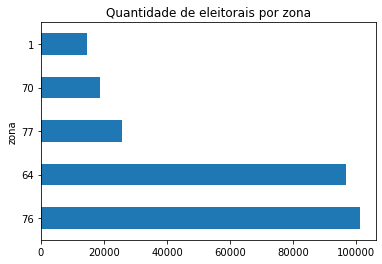

In [10]:
secoes.groupby('zona')['quantidade_eleitores'].sum().sort_values(ascending = False).head(10).plot(kind='barh', title = 'Quantidade de eleitorais por zona');

Quais zonas possuem mais seções com acessibilidade?

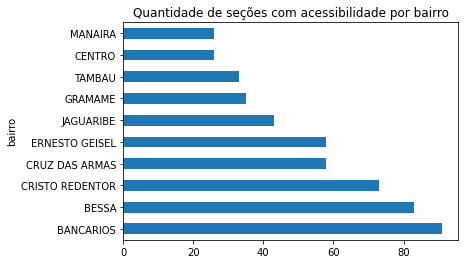

In [11]:
secoes.groupby('bairro')['situacao_secao_acessibilidade'].count().sort_values(ascending = False).head(10).plot(kind='barh', title = 'Quantidade de seções com acessibilidade por bairro');

Quais seções possuem mais eleitores?

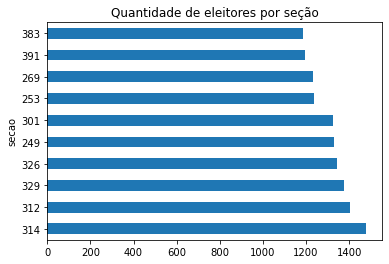

In [12]:
secoes.groupby('secao')['quantidade_eleitores'].sum().sort_values(ascending = False).head(10).plot(kind='barh', title = 'Quantidade de eleitores por seção');

Quais os bairros com mais seções eleitorais?

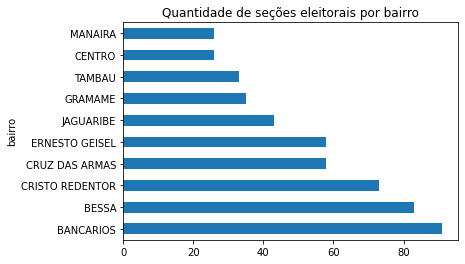

In [13]:
secoes.groupby('bairro')['secao'].count().sort_values(ascending = False).head(10).plot(kind='barh', title = 'Quantidade de seções eleitorais por bairro');

Quais os bairros com mais eleitores?

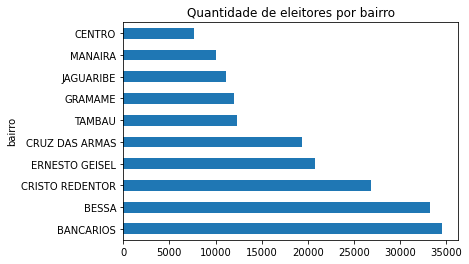

In [14]:
secoes.groupby('bairro')['quantidade_eleitores'].sum().sort_values(ascending = False).head(10).plot(kind='barh', title = 'Quantidade de eleitores por bairro');

In [15]:
secoes_coord = secoes[['zona',  'secao', 'bairro', 'latitude', 'longitude', 'quantidade_eleitores']]

In [16]:
secoes_coord.shape

(728, 6)

In [17]:
coordenadas = secoes_coord[['latitude', 'longitude',  'quantidade_eleitores']]

In [18]:
coordenadas.dropna(inplace = True)

C:\Users\nield\AppData\Local\Temp\ipykernel_6696\4257208966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coordenadas.dropna(inplace = True)


In [19]:
mapa_secoes = folium.Map(location=[-7.17088, -34.86536],
                        width = "100%",
                        height = "100%",
                        zoom_start=12, 
                        control_scale = True) 

In [20]:
mapa_secoes = mapa_secoes.add_child(plugins.HeatMap(coordenadas))

In [21]:
# mapa de calor da quantidade de eleitores por seção eleitoral
mapa_secoes